<font size="4">**INTRODUCCIÓN**</font>


In this project we are going to analyze the species that are found in different national parks to evaluate their state of conservation and what situation they are in, whether or not they are in danger of extinction and whether or not they are acting on the basis of their particular situation and if there is any pattern that relates those categories of fauna of those who are not classified with those who are, all in order to make some prediction to act better.

This study must be able to respond to what was proposed.


<font size ="4">**SCOPE**</font>

The way to carry out this study will first be based on knowing and understanding the databases and knowing the variables we have; once understood we will proceed to analyze them and relate them to each other through graphs and summarized data to draw conclusions and patterns that serve us to respond to the objective of the study.

To do this, we will set ourselves a series of objectives of analysis of the databases, we will analyze it and we will draw some conclusions, the fulfillment of those objectives should give us sufficient information for what is questioned.
             
<font size ="4">**GOALS**</font>


The objectives of this analysis are:

1. Distribution of data:

    A) How many species are there, how many categories, etc.

    B) How many national parks is the study based, how many species are distributed per park.

    C) In what situation each of the species is: Those who are not at risk, those who are, those who are in recovery, those who are in danger of extinction, etc., quantify it and summarize it.

    D) Conservation status of the species in question
    

2. Exposure of the information well summarized in data, or with graphs


3. Search for patterns


4. Draw conclusions according to the data obtained      

In [10]:
import pandas as pd
import numpy as np
import statsmodels as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

**We analyze the database that we have imported called 'observ' (observed data of animals by natural park) and we do the same with the 'species' (types of animals by category, their state of conservation and performance)**

In [322]:
observ = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")
print(observ.info())
print(observ.columns)
print("Shape: " + str(observ.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Shape: (23296, 3)


In [12]:
print("Number of species: " + str(observ.scientific_name.nunique()))
print("Number of park: " + str(observ.park_name.nunique()))
print("Number of observation as total: " + str(observ.observations.sum()))
print("Number of observation per " + str(observ.groupby(observ.park_name).observations.sum()))
print("Number of species per " + str(observ.scientific_name.groupby(observ.park_name).nunique()))
print("Maximum observations in a specicif specie is: " + str(observ.observations.max()))
print("Minimum observations in a specicif specie is: " + str(observ.observations.min()))
print("The Mean observations per specie is: " + str(round(observ.observations.mean(), 0)))
observ.head()

Number of species: 5541
Number of park: 4
Number of observation as total: 3314739
Number of observation per park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64
Number of species per park_name
Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: scientific_name, dtype: int64
Maximum observations in a specicif specie is: 321
Minimum observations in a specicif specie is: 9
The Mean observations per specie is: 142.0


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [13]:
print(species.columns)
print(species.info())
print("Shape: " + str(species.shape))
species.head()

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
Shape: (5824, 4)


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


<font size="6">**STUDING THE SPECIES DATAFRAME - STATUS CONSERVATION AND PROTECTED ANIMALS**</font>

In [16]:
print((species.conservation_status.groupby(species.conservation_status).count()))
print(("Sin status de conservacion:" + str(species.conservation_status.isnull().sum())))
species.category.groupby(species.category).count()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
Name: conservation_status, dtype: int64
Sin status de conservacion:5633


category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
Name: category, dtype: int64

**We copy the species database by species_1 since we are going to modify the original database by incorporating the Null value of conservation_status, since there is no information, by the string "not Intervention":**

In [17]:
species_1 = species
species_1.conservation_status.fillna("Not Intervention", inplace = True)
species_1.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Intervention
1,Mammal,Bos bison,"American Bison, Bison",Not Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not Intervention


**Now we summarize the total conservation_status by category and get an idea of the animals that are in danger of extinction, whether or not they are acting with the rest and in what proportion**

In [18]:
conservation_category = species_1[species_1.conservation_status != "Not Intervention"]\
.groupby(["conservation_status", "category"])["category"].count().unstack()

conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Count')

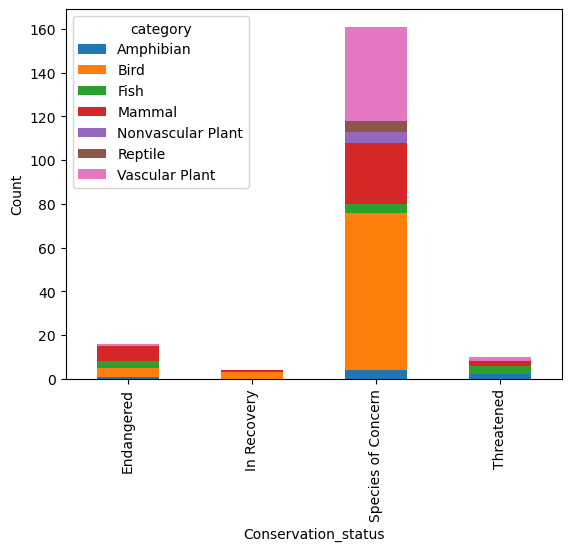

In [19]:
conservation_category.plot(kind = "bar", stacked = True)
plt.xlabel("Conservation_status")
plt.ylabel("Count")

In [20]:
conservation_categoryNO = species_1[species_1.conservation_status == "Not Intervention"].groupby(["conservation_status", "category"])\
                                  ["category"].count().unstack()

conservation_categoryNO



category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Not Intervention,73,442,116,176,328,74,4424


Text(0, 0.5, 'Count')

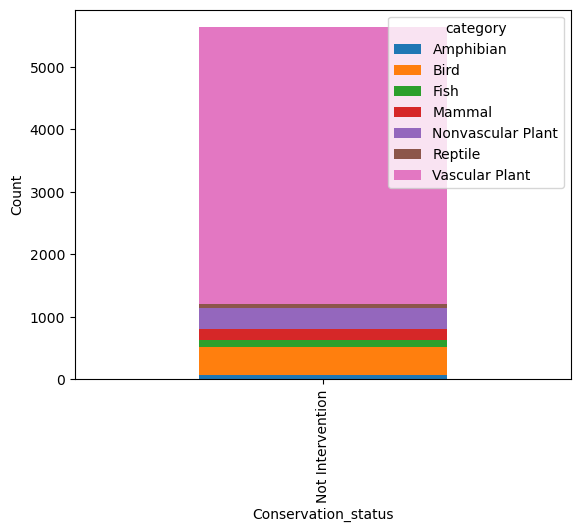

In [21]:
conservation_categoryNO.plot(kind = "bar", stacked = True)
plt.xlabel("Conservation_status")
plt.ylabel("Count")


**Now we are going to simplify the database in order to find out which species and in what proportion they are or are not protected.**

In [319]:
species_1['Protected'] = species_1.conservation_status != "Not Intervention"
resume_protected = species_1[["category", "scientific_name", "Protected"]]

protected_number = species_1.scientific_name[species_1.Protected == True].count()
not_protected_number = species_1.scientific_name[species_1.Protected == False].count()
print("species protected are " + str(protected_number))
print("species NOT protected are " + str(not_protected_number))
print("species protected represents the {}%".format(((protected_number / (protected_number + not_protected_number))*100)))



species protected are 191
species NOT protected are 5633
species protected represents the 3.279532967032967%


In [23]:
category_counts = species_1.groupby(['category', 'Protected'])\
                        .scientific_name.nunique().unstack()
category_counts['%Protected'] = round(category_counts[True] / (category_counts[True] + category_counts[False]), 2) * 100

category_counts


Protected,False,True,%Protected
category,,,
Amphibian,72,7,9.0
Bird,413,75,15.0
Fish,115,11,9.0
Mammal,146,30,17.0
Nonvascular Plant,328,5,2.0
Reptile,73,5,6.0
Vascular Plant,4216,46,1.0



<font size = "4">**Analisis de contingencia - nivel de significancia en estadística entre variables**</font>


Let's see if there is a relationship between the species that are protected from those that are not, in order to extrapolate data that make us think that you can see animals that are related to each other to act together. We will see it based on the highest percentages of protected species and we will see them with all of them until we see if there are any with a significance.

Mammal y Bird: Protected and Not Protected

||protected|not protected
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

It gives us a p-value result much higher than 0.05 in significance so there is no relationship between them

In [24]:
#values from mammals and Birds who are protected and no protected
contigencia1 = [[75, 413],
                [30, 146]]
chi2, p_value, dof, expected = chi2_contingency(contigencia1)
print("Expected: Protected - No Protected:\n" + str(expected))
print("p_value:" + str(p_value))
print("Chi2:" + str(chi2))




Expected: Protected - No Protected:
[[ 77.1686747 410.8313253]
 [ 27.8313253 148.1686747]]
p_value:0.6875948096661336
Chi2:0.16170148316545574


**Now we try with reptiles and mammals:**

In [25]:
#values from Mammals and Amphibial who are protected and no protected
contingecia2 = [[30, 146], [7, 72]]
chi2, p_value, dof, expected = chi2_contingency(contingecia2)
print("Expected: Protected - No Protected:\n" + str(expected))
print("p_value:" + str(p_value))
print("Chi2:" + str(chi2))



Expected: Protected - No Protected:
[[ 25.5372549 150.4627451]
 [ 11.4627451  67.5372549]]
p_value:0.12757669693198975
Chi2:2.321746712946015


**Now we try with mammals and Fish:**

In [26]:
contingecia3 = [[30, 146], [11, 115]]
chi2, p_value, dof, expected = chi2_contingency(contingecia3)
print("Expected: Protected - No Protected:\n" + str(expected))
print("p_value:" + str(p_value))
print("Chi2:" + str(chi2))

Expected: Protected - No Protected:
[[ 23.89403974 152.10596026]
 [ 17.10596026 108.89403974]]
p_value:0.0561483484489001
Chi2:3.647651024981415


**Now we try with Birds and Reptiles:**

In [27]:
contingecia4 = [[75, 413], [5, 73]]
chi2, p_value, dof, expected = chi2_contingency(contingecia4)
print("Expected: Protected - No Protected:\n" + str(expected))
print("p_value:" + str(p_value))
print("Chi2:" + str(chi2))

Expected: Protected - No Protected:
[[ 68.97526502 419.02473498]
 [ 11.02473498  66.97526502]]
p_value:0.05313542232154235
Chi2:3.7396547786854963


**We identify that there is a differential significance between Mammals and Reptiles to take into account, it tells us that we must be more concerned about the protection of Mammals.**

**Therefore, now we are going to see which animals make up the category of Mammals to see what is the number of each one that is protected, to see if there is any animal that differs from the others.**

In [28]:
dict_common_names = species_1[['common_names', 'Protected']]
dict_common_names.head()

,common_names,Protected
0,Gapper's Red-Backed Vole,False
1,"American Bison, Bison",False
2,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",False
3,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",False
4,Wapiti Or Elk,False


In [298]:
names_protected =species_1[species.Protected == True].common_names.reset_index(drop = True)
data = []
for name in names_protected:
    values = name.split(',')
    data.extend(values)

species_protected = pd.DataFrame({'common_names': data})

**the most protected animals who are protected:**

In [299]:
split_data = [phrase.split(' ') for phrase in data]
animals = [sublist[-1] for sublist in split_data if sublist]  # Exclude empty sublists
series_animals = pd.Series(animals)
series_animals.value_counts().head(10)


Myotis     23
Bat        16
Wolf        6
Hawk        4
Snake       4
Warbler     4
Sparrow     4
Darter      3
Falcon      3
Sheep       3
Name: count, dtype: int64

In [297]:
species_protected = pd.DataFrame({'common_names': data})

In [59]:
names_no_protected =species_1[species.Protected == False].common_names.reset_index(drop = True)
data2 = []
for name in names_no_protected:
    values = name.split(',')
    data2.extend(values)


species_not_protected = pd.DataFrame({'common_names': data2})

print("numbers of common names that are not protected: " + str(len(data2)))
print("Only the {}% of animals are protected".format(round(len(data)/(len(data)+len(data2))*100, 2)))

numbers of common names that are not protected: 8870
Only the 2.69% of animals are protected


**Incorporamos las categorías de animales, las especies a las que corresponde y cuales de ellas están protegidas a la que pertenece cada especie de la base de datos de 'species', cogemos ese campo creando una tabla nueva llamada 'observ2' ya que estamos modificando la original, para averiguar su distribución por parque Natural por category de especie animal para simplificiar su visualización.**

**Observamos que la distribución de animales entre diferentes parques naturales es homogénea, por lo que las actuaciones deberán ser por igual en caso de necesitarlo, vemos claramente que en YellowStone National Park tiene sustancialmente muchos más animales que el resto pero tiene las mismas proporciones de diversidad de especies de animales por categoría.**

In [208]:
observ2 = observ

mapping_category = species_1.set_index('scientific_name')['category'].to_dict()
observ2['category'] = observ2['scientific_name'].map(mapping_category)

mapping_protected = species_1.set_index('scientific_name')['Protected'].to_dict()
observ2['Protected'] = observ2['scientific_name'].map(mapping_protected)

mapping_status = species_1.set_index('scientific_name')['conservation_status'].to_dict()
observ2['status'] = observ2['scientific_name'].map(mapping_status)

mapping_names = species_1.set_index('scientific_name')['common_names'].to_dict()
observ2['common_names'] = observ2['scientific_name'].map(mapping_names)

observ2.head()

,scientific_name,park_name,observations,category,Protected,status,common_names,observ_percetaje_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,False,Not Intervention,"Purple Vetch, Reddish Tufted Vetch",0.0
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,False,Not Intervention,American Mink,0.0
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,False,Not Intervention,Klamath Plum,0.0
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,False,Not Intervention,Velvetleaf,0.0
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,False,Not Intervention,Common Bluecup,0.0


In [207]:
print("We check if we have, at list, same numbers of rows as the original in order to see if there are any modification. Original number of rows: {}, data modificated rows: {}".format(len(observ),len(observ2)))
print("Species protected observations : {} and species no protected obervation {}".format(observ2[observ2.Protected == True].observations.sum(), observ2[observ2.Protected == False].observations.sum()))
print(observ2.groupby(['park_name', 'Protected', 'status']).observations.sum())

We check if we have, at list, same numbers of rows as the original in order to see if could be any modification. Original number of rows: 23296, data modificated rows: 23296
Species protected observations : 90108 and species no protected obervation 3224631
park_name                            Protected  status            
Bryce National Park                  False      Not Intervention       559762
                                     True       Endangered                489
                                                In Recovery               258
                                                Species of Concern      14925
                                                Threatened                591
Great Smoky Mountains National Park  False      Not Intervention       420543
                                     True       Endangered                334
                                                In Recovery               189
                                                Spec

**Differents species categories among differents natural parks:**

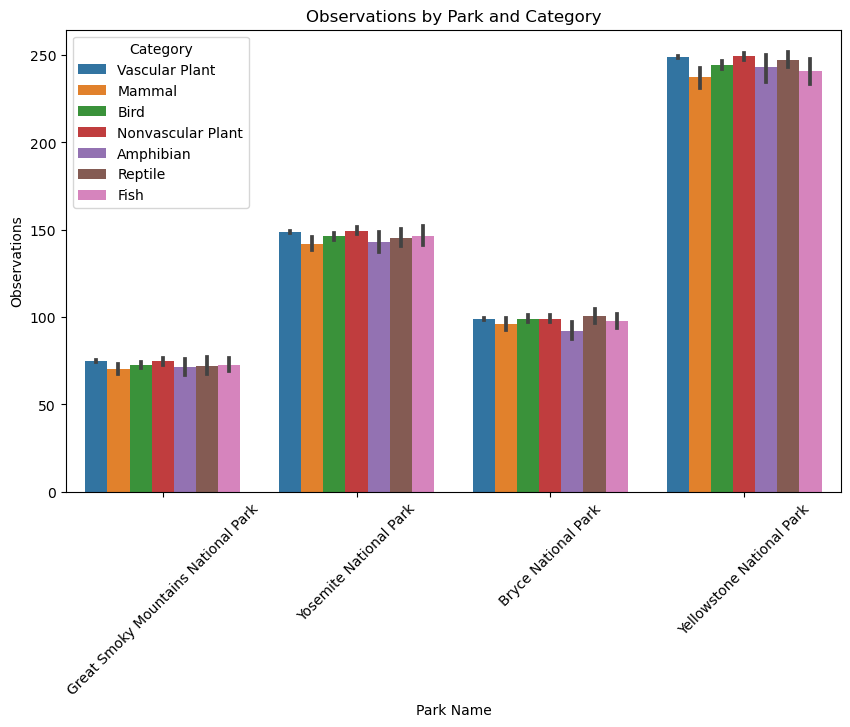

In [204]:

plt.figure(figsize=(10, 6))
sns.barplot(x='park_name', y='observations', data=observ2, hue='category')
plt.title('Observations by Park and Category')
plt.xlabel('Park Name')
plt.ylabel('Observations')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

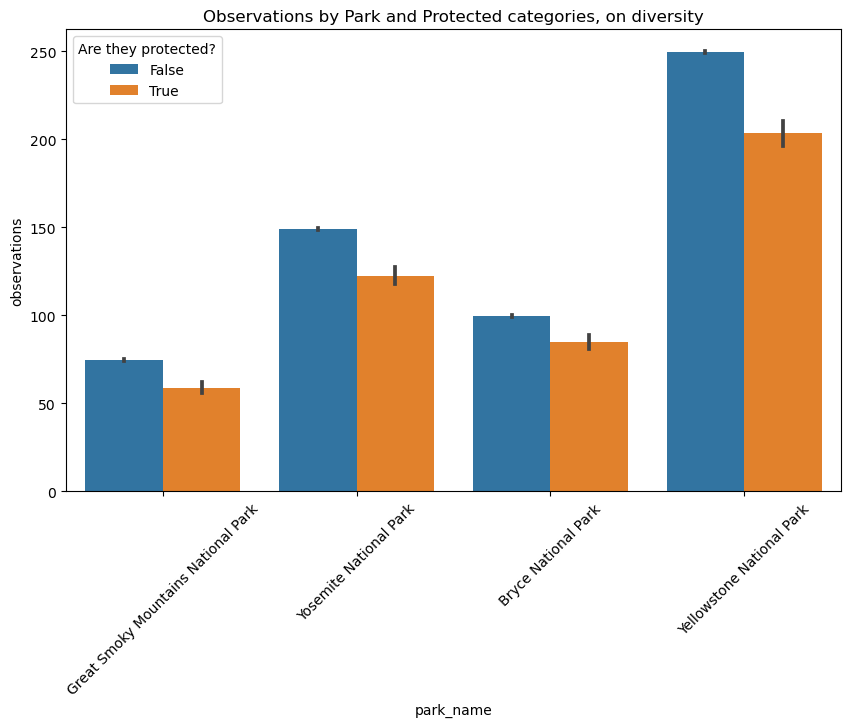

In [209]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'park_name', y = 'observations', data = observ2, hue = 'Protected')
plt.xticks(rotation = 45)
plt.title("Observations by Park and Protected categories, on diversity")
legend = plt.legend(loc= 'upper left')
legend.set_title("Are they protected?")

**Now we want to visualize the Protected category Mammals in order to see the distribution among the different parks:**

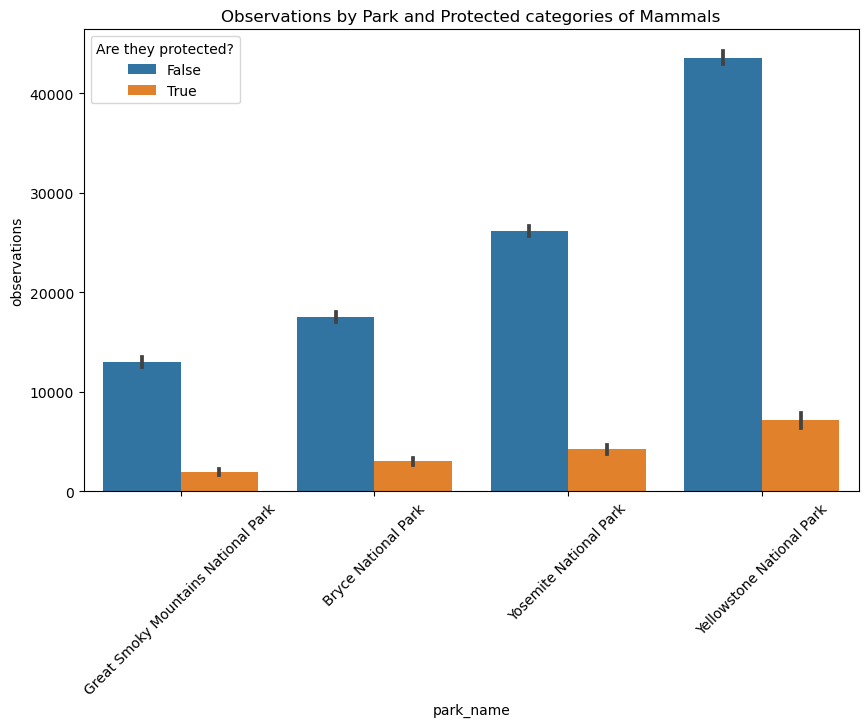

In [205]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'park_name', y = 'observations', data = observ2[observ2.category == 'Mammal'], hue = 'Protected', estimator = sum)
plt.xticks(rotation = 45)
plt.title("Observations by Park and Protected categories of Mammals")
legend = plt.legend(loc= 'upper left')
legend.set_title("Are they protected?")

**Species categories who was observated on different parks who are on state endangered:**

In [185]:
total_protected_observations = observ2[observ2.Protected == True].observations.sum()
observ2['observ_percetaje_protected'] = (observ2.observations / total_protected_observations)*100
observ2.loc[observ2['status'] == 'Not Intervention', 'observ_percetaje_protected'] = 0
observ2[observ2.status == "Endangered"].groupby(['park_name','category']).observations.sum().unstack()

category,Amphibian,Bird,Fish,Mammal,Vascular Plant
park_name,,,,,
Bryce National Park,31,98,70,265,25
Great Smoky Mountains National Park,11,61,77,158,27
Yellowstone National Park,60,243,202,660,63
Yosemite National Park,42,172,106,380,47


**Percentaje of species categories who are protected on differents nartional parks:**

In [321]:
observ2[observ2.Protected == True].groupby(['park_name', 'status']).observ_percetaje_protected.sum().unstack()


status,Endangered,In Recovery,Species of Concern,Threatened
park_name,,,,
Bryce National Park,0.542682,0.286323,16.563457,0.655880
Great Smoky Mountains National Park,0.370666,0.209748,11.446264,0.488303
Yellowstone National Park,1.362809,0.620367,39.717894,1.619168
Yosemite National Park,0.829005,0.428375,23.916855,0.942203


<font size="4">**CONCLUSIONS:**</font>

We observe that the number of protected versus unprotected species is a very small number: only 3.28% are protected.

They are the Mammals, the Birds the most protected categories (they represent 32%), without being many, and among them are the Myotis with 23 and Bats with 16 of the animal species most types protected.

Only are 16 species on endangered situation, special the Mamals and Birds.

On nationals Parks: There is an homgeneus animals distribution among all species categories.

Regardind the observations on nationals parks: 90.108 speciesthat are protected animals have been seen, and 3.224.631 observations correspond to animals not protected, there is a big difference, we might conclude that the species are on a safe condition otherwise they will be on trouble.

If we want to establish animal conservation policies, especially on politics of protected species, it would be a very precise and lower cost action if we focused exclusively on the natural parks of Yellowstone National Park and Yosemite National Park, they two represent almost 70% of the species that are having some specific action.











